# APIs


##¿Qué es una API?
Las API son mecanismos que permiten a dos componentes de software comunicarse entre sí mediante un conjunto de definiciones y protocolos. Por ejemplo, el sistema de software del instituto de meteorología contiene datos meteorológicos diarios. La aplicación meteorológica de su teléfono “habla” con este sistema a través de las API y le muestra las actualizaciones meteorológicas diarias en su teléfono.

API significa “interfaz de programación de aplicaciones”. En el contexto de las API, la palabra aplicación se refiere a cualquier software con una función distinta. La interfaz puede considerarse como un contrato de servicio entre dos aplicaciones. Este contrato define cómo se comunican entre sí mediante solicitudes y respuestas. La documentación de su API contiene información sobre cómo los desarrolladores deben estructurar esas solicitudes y respuestas.


## Tipos de API
1. **API de SOAP**: Estas API utilizan el protocolo simple de acceso a objetos. El cliente y el servidor intercambian mensajes mediante XML. Se trata de una API menos flexible que era más popular en el pasado.
2. **API de RPC**: Estas API se denominan llamadas a procedimientos remotos. El cliente completa una función (o procedimiento) en el servidor, y el servidor devuelve el resultado al cliente.
3. **API de WebSocket**: La API de WebSocket es otro desarrollo moderno de la API web que utiliza objetos JSON para pasar datos. La API de WebSocket admite la comunicación bidireccional entre las aplicaciones cliente y el servidor. El servidor puede enviar mensajes de devolución de llamada a los clientes conectados, por lo que es más eficiente que la API de REST.
4. **API de REST**: Estas son las API más populares y flexibles que se encuentran en la web actualmente. El cliente envía las solicitudes al servidor como datos. El servidor utiliza esta entrada del cliente para iniciar funciones internas y devuelve los datos de salida al cliente. Veamos las API de REST con más detalle a continuación.

Leer [más](https://aws.amazon.com/es/what-is/api/)

## API de Twitter
Tomado de [Twitter](https://help.twitter.com/es/rules-and-policies/twitter-api)

1. Twitter es lo qué está pasando en el mundo y sobre lo que las personas están hablando en este momento. Puedes acceder a Twitter en la Web o desde tu dispositivo móvil. Para compartir información en Twitter de la forma más amplia posible, también les proporcionamos a las empresas, los desarrolladores y los usuarios acceso programático a los datos de Twitter mediante nuestras API (interfaces de programación de aplicaciones).

2. Los datos de Twitter son únicos y se extraen a partir de datos de la mayoría de las otras plataformas sociales porque reflejan información que los usuarios deciden compartir de forma pública. Nuestra plataforma de API ofrece acceso amplio a los datos de Twitter que los usuarios han decidido compartir con el mundo.



### Tipos de datos en twitter

1. **Cuentas y usuarios**: Les permitimos a los desarrolladores administrar de forma programática el perfil y la configuración de una cuenta, silenciar o bloquear usuarios, administrar usuarios y seguidores, solicitar información sobre actividad de una cuenta autorizada y mucho más.

2. **Tweets y respuestas**: Los Tweets y las respuestas públicas están a disposición de los desarrolladores, y les permitimos publicar Tweets a través de nuestra API. Los desarrolladores pueden acceder a los Tweets al buscar palabras clave específicas o solicitar una muestra de Tweets de cuentas específicas. 

3. **Mensajes Directos**: Nuestros puntos de conexión de Mensajes directos brindan acceso a las conversaciones por DM de usuarios que han otorgado permiso de forma explícita a una aplicación específica. No vendemos Mensajes Directos. Nuestras API de DM proporcionan acceso limitado a desarrolladores para crear experiencias personalizadas en Twitter

In [34]:
import tweepy
 
import pandas as pd
import numpy as np
import csv
import re 
import string
import csv
import gensim
import sys

### parámetros

Vamos [acá](https://developer.twitter.com/en/portal/apps/17823883/settings)

1. Debemos revisar los Tokens y demás, [leer](https://developer.twitter.com/en/portal/apps/17823883/keys)

2. Son mis tokens, cuidado con ellos

Para que la API funcione, es necesario tener estos parámetros

1. consumer_key
2. consumer_secret
3. access_key
4. access_secret
 

In [36]:
consumer_key = api_key
consumer_secret = api_key_secret
access_key= Token
access_secret = Secret_Token

## Conectar la API

1. Usamos la función [OAuthHandler](https://docs.tweepy.org/en/v3.5.0/auth_tutorial.html) para dar nuestros codigos de consumidor

2. Usamos la función [set_access_token](https://python.hotexamples.com/examples/tweepy/OAuthHandler/set_access_token/python-oauthhandler-set_access_token-method-examples.html) para dar nuestros codigos de acceso

In [37]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)

### Invocamos la API 

Con la función [API](https://docs.tweepy.org/en/stable/api.html)


In [38]:
api = tweepy.API(auth,wait_on_rate_limit=True)

## Vamos a la busqueda

1. Definimos la palabra clave para buscar (o el string)
2. Filtrar [" -filter:retweets"] permite eliminar los re-tweets

In [39]:
search_words = "Millonarios"      #enter your words
new_search = search_words + " -filter:retweets"

### Guardar el CSV

1. Es mejor guardar los tweets en un formato plano, cómo [csv](https://www.codingem.com/python-write-to-csv-file/)
2.Antes de todo, vamos por un ejemplo de escribir en csv
3. La función open en Python, [¿cómo funciona?](https://www.w3schools.com/python/ref_func_open.asp)

In [40]:
import os
os.getcwd()

'C:\\Users\\nelso\\OneDrive\\Documentos\\2022\\CESA'

In [41]:
import csv

data = ["This", "is", "a", "Test"]

with open('example.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(data)

¿Qué realiza el siguiente código?

In [61]:
csvFile = open('Twitter.csv', 'a',encoding= 'unicode_escape')
csvWriter = csv.writer(csvFile)

## Vamos a correr la API

1. Leer [esto](https://patricrp.medium.com/buscando-contenido-con-la-api-de-twitter-f3c12994a77f)

2. Leer tambien [esto](https://docs.tweepy.org/en/v3.5.0/cursor_tutorial.html)

3. Cuando se realiza una petición a la API de Twitter se utiliza con frecuencia la paginación, que ayuda a organizar la información que devuelve Twitter: usuarios, tweets, timeline, etc. Cursor es un objeto que facilita esta paginación, en recursos y en organización de la información. Cursor organiza esta información en ítems o páginas. Indica si prefieres que devuelva uno u otro:

In [62]:
for tweet in tweepy.Cursor(api.search_tweets,q=new_search,count=1000,
                           lang="es",
                           since_id=0).items(1000):
   csvWriter.writerow([tweet.created_at, tweet.text,
                       tweet.user.screen_name, tweet.user.location])

## Trampa de Pandas :)

Convertiré el csv a Pandas Dataframe para _verlo más lindo_

In [98]:
datos = pd.read_csv('Twitter.csv', header=None, encoding='unicode_escape')
datos

,0,1,2,3
0,2022-10-04 03:31:24+00:00,Exentrenador de Millonarios: A mis jugadores ...,julianmenesesAE,"Bogotá, D.C., Colombia"
1,2022-10-04 03:31:13+00:00,#UltimaJugada Si es el indicado para dirigir N...,JuanSebCamelo,"Medellín, Colombia"
2,2022-10-04 03:31:08+00:00,"@Tschapire Los mismos, pero los necesito millo...",CaroMeliMarzo,Mendoza-Argentina
3,2022-10-04 03:31:05+00:00,@deniseramosm Suena a qué sus empresas fantasm...,jorgenavardele1,NaN
4,2022-10-04 03:31:24+00:00,Exentrenador de Millonarios: A mis jugadores ...,julianmenesesAE,"Bogotá, D.C., Colombia"
...,...,...,...,...
2097,2022-10-03 20:01:46+00:00,#elintermedio @marianofake\r\n¿Ya se ha llenad...,rcko3,NaN
2098,2022-10-03 20:01:46+00:00,"""estos jóvenes no tienen que formarse para que...",shaketheshit,NaN
2099,2022-10-03 20:01:22+00:00,@QuitoConPabel @pabelml @RADIOAMERICAEC @RC5Of...,solemoran05,NaN
2100,2022-10-03 20:00:25+00:00,@popi_poldosky @D3xterGr @Ssssergioo_ @padrura...,Dcr57569484,NaN


In [99]:
datos.columns=["Fecha", "Tweet", "Usuario", "Lugar"]
datos

,Fecha,Tweet,Usuario,Lugar
0,2022-10-04 03:31:24+00:00,Exentrenador de Millonarios: A mis jugadores ...,julianmenesesAE,"Bogotá, D.C., Colombia"
1,2022-10-04 03:31:13+00:00,#UltimaJugada Si es el indicado para dirigir N...,JuanSebCamelo,"Medellín, Colombia"
2,2022-10-04 03:31:08+00:00,"@Tschapire Los mismos, pero los necesito millo...",CaroMeliMarzo,Mendoza-Argentina
3,2022-10-04 03:31:05+00:00,@deniseramosm Suena a qué sus empresas fantasm...,jorgenavardele1,NaN
4,2022-10-04 03:31:24+00:00,Exentrenador de Millonarios: A mis jugadores ...,julianmenesesAE,"Bogotá, D.C., Colombia"
...,...,...,...,...
2097,2022-10-03 20:01:46+00:00,#elintermedio @marianofake\r\n¿Ya se ha llenad...,rcko3,NaN
2098,2022-10-03 20:01:46+00:00,"""estos jóvenes no tienen que formarse para que...",shaketheshit,NaN
2099,2022-10-03 20:01:22+00:00,@QuitoConPabel @pabelml @RADIOAMERICAEC @RC5Of...,solemoran05,NaN
2100,2022-10-03 20:00:25+00:00,@popi_poldosky @D3xterGr @Ssssergioo_ @padrura...,Dcr57569484,NaN


In [100]:
datos["Tweet"]=datos["Tweet"].fillna("acá")

In [66]:
datos.loc[300,"Tweet"]

'@evoespueblo @pagina_siete PÃ¡gina 7 es el SICARIO DE LA DERECHA FACHA diario de la MENTIRA del cartel de los NARCOGâ\x80¦ https://t.co/E3Gx50HaMZ'

In [67]:
datos.Tweet

0       Exentrenador de Millonarios: A mis jugadores ...
1       #UltimaJugada Si es el indicado para dirigir N...
2       @Tschapire Los mismos, pero los necesito millo...
3       @deniseramosm Suena a qué sus empresas fantasm...
4       Exentrenador de Millonarios: A mis jugadores ...
                              ...                        
2097    #elintermedio @marianofake\r\n¿Ya se ha llenad...
2098    "estos jóvenes no tienen que formarse para que...
2099    @QuitoConPabel @pabelml @RADIOAMERICAEC @RC5Of...
2100    @popi_poldosky @D3xterGr @Ssssergioo_ @padrura...
2101    Alfredo Arias palpitó un nuevo clásico contra ...
Name: Tweet, Length: 2102, dtype: object

## Hagamos una Nube de palabras

1. para empezar a _trillar_ cositas con Python, de acá en adelante es cómo _limpiar_ textos

2. Basado en esta [página](https://datascientest.com/es/como-generar-un-wordcloud-con-python) y en está otra [qué es de lectura obligatoría](https://datapeaker.com/big-data/nube-de-palabras-en-python-como-construir-word-cloud-en-python/)

3. Vamos ir usando librerias, la documentación de [WordCloud](https://amueller.github.io/word_cloud/)

In [69]:
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


## Código básico de Nube de palabras

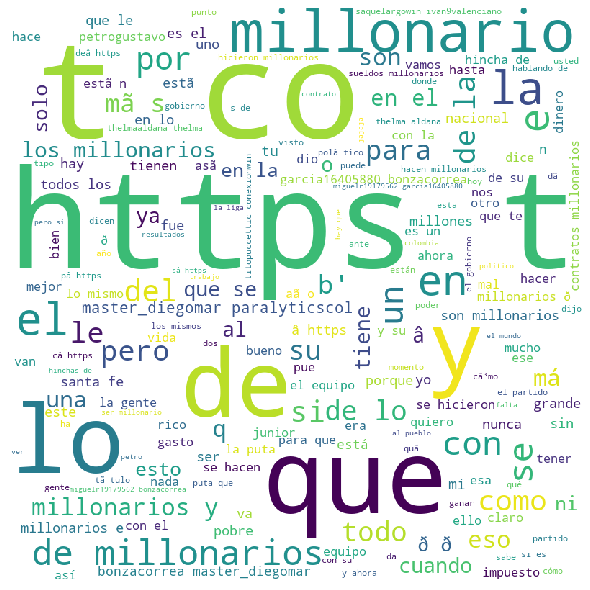

In [70]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in datos.Tweet:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

1. Esta nube de palabras no dice nada
2. Tiene muchas palabras [vacias](https://www.yoseomarketing.com/blog/stop-words-en-espanol-lista-definitiva/)

### Que problema el español

1. Los siguientes códigos se adaptaron de [acá](https://medium.com/codex/making-wordcloud-of-tweets-using-python-ca114b7a4ef4)
2. La libreria [NLTK](https://www.nltk.org/)

3. BeautifulSoup es para obtener cosillas de [HTML](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

In [71]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, WordPunctTokenizer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
token = WordPunctTokenizer()

1. Cargamos las palabras vacias del español

In [72]:
nltk.download('stopwords')
stops = set(stopwords.words('spanish'))
stops

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nelso\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


{'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

### Eliminamos cosas de ruido

1. Emoticones
2. Simbolos
3. Otros diagramas 
4. Banderitas

Usamos en todos expresiones [regulares](https://www.w3schools.com/python/python_regex.asp) 

In [73]:
regex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)

In [74]:
datos["Tweet"][990]

'La generaciÃ³n X se enorgullecÃ\xada de facturar 80 horas de trabajo a la semana. Fue asÃ\xad como crearon el Internet y seâ\x80¦ https://t.co/Tirs3VBP4Y'

In [76]:
match = re.sub(regex_pattern,'',datos["Tweet"][990]) #replaces pattern with ''
print(match)

La generaciÃ³n X se enorgullecÃ­a de facturar 80 horas de trabajo a la semana. Fue asÃ­ como crearon el Internet y seâ¦ https://t.co/Tirs3VBP4Y


### Quito las URLS de los tweets

In [77]:
datos["Tweet"][990]

'La generaciÃ³n X se enorgullecÃ\xada de facturar 80 horas de trabajo a la semana. Fue asÃ\xad como crearon el Internet y seâ\x80¦ https://t.co/Tirs3VBP4Y'

In [78]:
pattern = re.compile(r'(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?')
match = re.sub(pattern,'',datos["Tweet"][990])
print(match)

La generaciÃ³n X se enorgullecÃ­a de facturar 80 horas de trabajo a la semana. Fue asÃ­ como crearon el Internet y seâ¦ 


## Quito todo los @

In [79]:
datos["Tweet"][990]

'La generaciÃ³n X se enorgullecÃ\xada de facturar 80 horas de trabajo a la semana. Fue asÃ\xad como crearon el Internet y seâ\x80¦ https://t.co/Tirs3VBP4Y'

In [80]:
re_list = ['@[A-Za-z0–9_]+', '#']
combined_re = re.compile( '|'.join( re_list) )
match = re.sub(combined_re,'',datos["Tweet"][990])
print(match)

La generaciÃ³n X se enorgullecÃ­a de facturar 80 horas de trabajo a la semana. Fue asÃ­ como crearon el Internet y seâ¦ https://t.co/Tirs3VBP4Y


## Elimina los códigos HTML

Los códigos HTML son pasados a texto

In [81]:
del_amp = BeautifulSoup(datos["Tweet"][990], 'lxml')
del_amp_text = del_amp.get_text()
print(del_amp_text)

La generaciÃ³n X se enorgullecÃ­a de facturar 80 horas de trabajo a la semana. Fue asÃ­ como crearon el Internet y seâ¦ https://t.co/Tirs3VBP4Y


C:\Users\nelso\anaconda3\lib\site-packages\bs4\__init__.py:439: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning


## Creo una función 

1. Cómo son varios pasos, creo la función que los hace todos
2. ¿Qué es una función?


In [82]:
def cleaning_tweets(t):
    del_amp = BeautifulSoup(t, 'lxml')
    del_amp_text = del_amp.get_text()
    del_link_mentions = re.sub(combined_re, '', del_amp_text)
    del_https = re.sub(pattern,'',del_link_mentions)
    del_emoticons = re.sub(regex_pattern, '', del_https )
    lower_case = del_emoticons.lower()
    words = token.tokenize(lower_case)
    result_words = [x for x in words if len(x) > 2]
    return (" ".join(result_words)).strip()

## Se la aplico a todos los tweets 


In [101]:
cleaned_tweets = []
for i in range(datos.shape[0]):                                                                 
    cleaned_tweets.append(cleaning_tweets(datos["Tweet"][i]))

C:\Users\nelso\anaconda3\lib\site-packages\bs4\__init__.py:439: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning


In [103]:
cleaned_tweets

['exentrenador millonarios mis jugadores les costó aceptar tono venezolano',
 'ultimajugada indicado para dirigir nacional ver por fin millonarios del alma queda campeón',
 'los mismos pero los necesito millonarios',
 'suena qué sus empresas fantasmas van tener contratos millonarios sin que nadie haga pdo',
 'exentrenador millonarios mis jugadores les costó aceptar tono venezolano',
 'ultimajugada indicado para dirigir nacional ver por fin millonarios del alma queda campeón',
 'los mismos pero los necesito millonarios',
 'suena qué sus empresas fantasmas van tener contratos millonarios sin que nadie haga pdo',
 'creen intocables',
 'brg432',
 'jajajajajajajaja trabajaba millonarios que marica tan bobo jajanajajajajajajjaja',
 'exentrenador millonarios mis jugadores les costã³ aceptar tono venezolanoâ',
 'ultimajugada indicado para dirigir nacional ver por fin millonarios del alma queda campeã³n',
 'los mismos pero los necesito millonarios',
 'suena quã sus empresas fantasmas van tener 

1. Los vuelvo un string

In [104]:
string = pd.Series(cleaned_tweets).str.cat(sep=' ')
string

'exentrenador millonarios mis jugadores les costó aceptar tono venezolano ultimajugada indicado para dirigir nacional ver por fin millonarios del alma queda campeón los mismos pero los necesito millonarios suena qué sus empresas fantasmas van tener contratos millonarios sin que nadie haga pdo exentrenador millonarios mis jugadores les costó aceptar tono venezolano ultimajugada indicado para dirigir nacional ver por fin millonarios del alma queda campeón los mismos pero los necesito millonarios suena qué sus empresas fantasmas van tener contratos millonarios sin que nadie haga pdo creen intocables brg432 jajajajajajajaja trabajaba millonarios que marica tan bobo jajanajajajajajajjaja exentrenador millonarios mis jugadores les costã³ aceptar tono venezolanoâ ultimajugada indicado para dirigir nacional ver por fin millonarios del alma queda campeã³n los mismos pero los necesito millonarios suena quã sus empresas fantasmas van tener contratos millonarios sin que nadie haga pdo con audio no

### Realizo el WorldCloud

1. Importante las palabras vacias

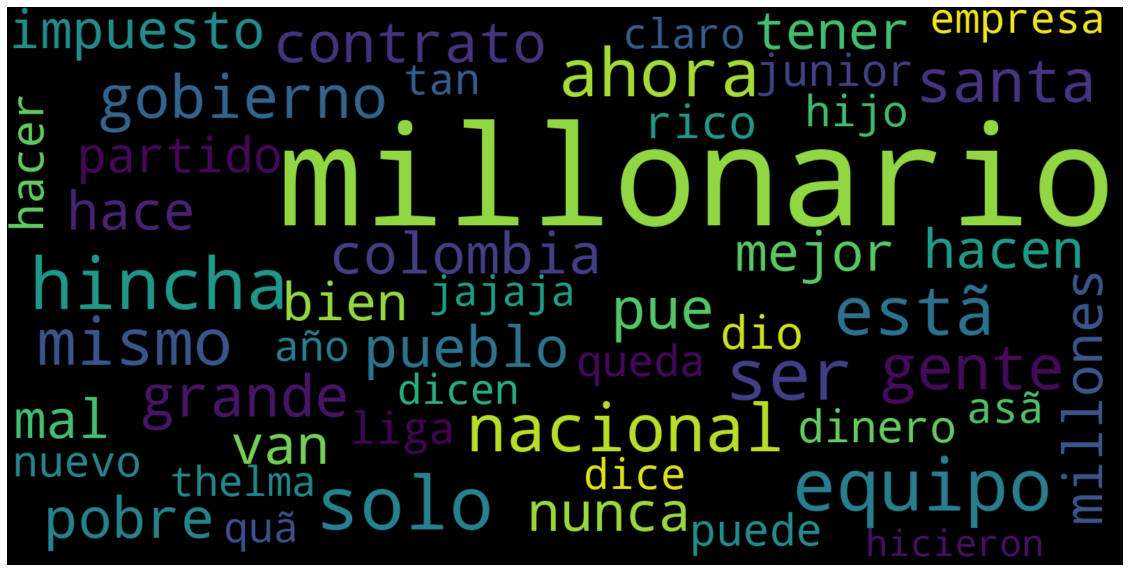

In [105]:
wordcloud = WordCloud(width=1600, stopwords=stops,height=800,max_font_size=200,
                      max_words=50,collocations=False, background_color='black').generate(string)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [106]:
stops.update(["millonario", "millonarios", "luna"])
stops

{'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

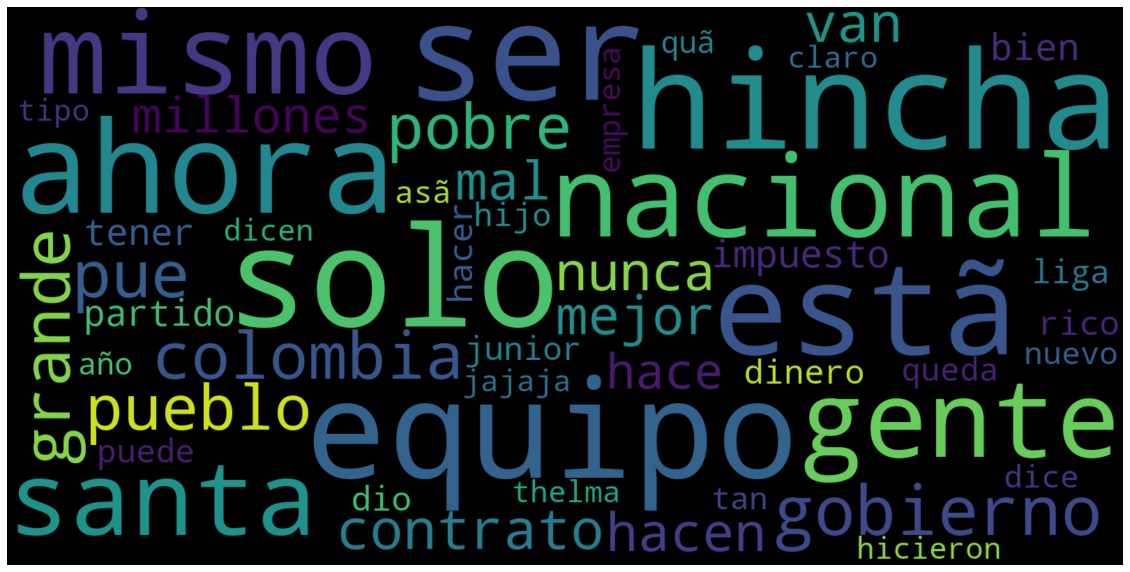

In [108]:
wordcloud = WordCloud(width=1600, stopwords=stops,height=800,max_font_size=200,
                      max_words=50,collocations=False, background_color='black').generate(string)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Analisis de sentimientos

1. Basado en [acá](https://www.linkedin.com/pulse/an%C3%A1lisis-de-sentimiento-o-polaridad-texto-en-espa%C3%B1ol-con-pablo-moreno/?trk=pulse-article_more-articles_related-content-card&originalSubdomain=es)
2. ¿Qué es un sentimiento?

In [110]:
from sentiment_analysis_spanish import sentiment_analysis
sentiment = sentiment_analysis.SentimentAnalysisSpanish()

C:\Users\nelso\anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\nelso\anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [111]:
datos['puntaje'] = datos['Tweet'].apply(lambda x: sentiment.sentiment(x))

In [112]:
datos['puntaje'] = np.round(datos['puntaje'], 4)
datos["cleaned_tweets"] = cleaned_tweets
datos 

,Fecha,Tweet,Usuario,Lugar,puntaje,cleaned_tweets
0,2022-10-04 03:31:24+00:00,Exentrenador de Millonarios: A mis jugadores ...,julianmenesesAE,"Bogotá, D.C., Colombia",0.0833,exentrenador millonarios mis jugadores les cos...
1,2022-10-04 03:31:13+00:00,#UltimaJugada Si es el indicado para dirigir N...,JuanSebCamelo,"Medellín, Colombia",0.0066,ultimajugada indicado para dirigir nacional ve...
2,2022-10-04 03:31:08+00:00,"@Tschapire Los mismos, pero los necesito millo...",CaroMeliMarzo,Mendoza-Argentina,0.0150,los mismos pero los necesito millonarios
3,2022-10-04 03:31:05+00:00,@deniseramosm Suena a qué sus empresas fantasm...,jorgenavardele1,NaN,0.0006,suena qué sus empresas fantasmas van tener con...
4,2022-10-04 03:31:24+00:00,Exentrenador de Millonarios: A mis jugadores ...,julianmenesesAE,"Bogotá, D.C., Colombia",0.0833,exentrenador millonarios mis jugadores les cos...
...,...,...,...,...,...,...
2097,2022-10-03 20:01:46+00:00,#elintermedio @marianofake\r\n¿Ya se ha llenad...,rcko3,NaN,0.0021,elintermedio llenado andalucía millonarios tod...
2098,2022-10-03 20:01:46+00:00,"""estos jóvenes no tienen que formarse para que...",shaketheshit,NaN,0.0000,estos jóvenes tienen que formarse para que vue...
2099,2022-10-03 20:01:22+00:00,@QuitoConPabel @pabelml @RADIOAMERICAEC @RC5Of...,solemoran05,NaN,0.4979,5oficial
2100,2022-10-03 20:00:25+00:00,@popi_poldosky @D3xterGr @Ssssergioo_ @padrura...,Dcr57569484,NaN,0.0000,3xtergr que genere cada uno bien parece los qu...


In [113]:
list(datos[datos["puntaje"]>0.9]["Tweet"])

['@ParalyticsCOL @MillosFCoficial 7 partidos a disputado @MillosDColombia contra el Real Madrid \r\n3 victorias de milloâ\x80¦ https://t.co/yNch9RqpiZ',
 'Se me ocurren muchos negocios millonarios en el aeropuerto en cd de MÃ©xico ð\x9f¤\x94ð\x9f\x93\x88ð\x9f\x92µ',
 '@MiguelR19179562 @BonzaCorrea @Master_DiegoMar @ParalyticsCOL Perfecto usted llegÃ³ a la conclusiÃ³n.\r\nSanta Fe y millâ\x80¦ https://t.co/zmBqtDUNSb',
 '@SanDAnger00 @aprachile @Diego_Schalper @javiermacaya @desbordes Muy bien, debemos desechar a todos estos polÃ\xadticosâ\x80¦ https://t.co/oBnDklgXNy',
 'Imagenes de afortunados justo en el momento de hacerse millonarios! ð\x9f\x92µ https://t.co/xMtN3qnfJC',
 '@okdiario Madrid, paraÃ\xadso fiscal para millonarios y mafiosos.',
 '@iescolar @eldiarioes Ha rectificado a tiempo. Bajaba los impuestos a los millonarios. Son unos lumbreras los hijos de la gran BretaÃ±a.',
 '@ParalyticsCOL @MillosFCoficial 7 partidos a disputado @MillosDColombia contra el Real Madrid \r\n3 vict

## Una nube solo con sentimientos muy positivos


C:\Users\nelso\anaconda3\lib\site-packages\bs4\__init__.py:439: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning


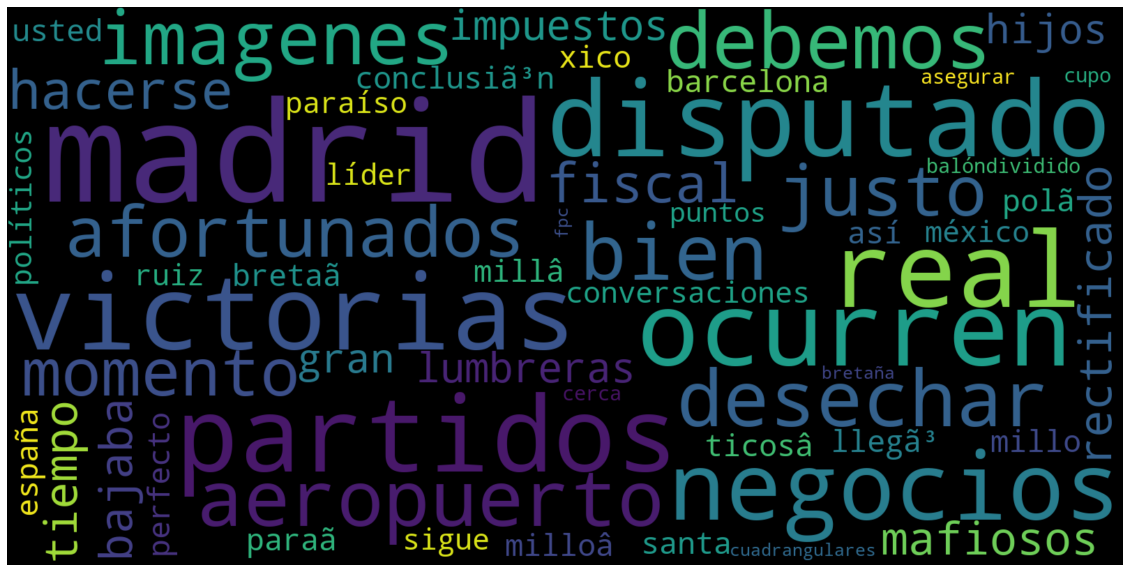

In [114]:
positivo = datos[datos["puntaje"]>0.9]
cleaned_tweets = []
for i in positivo.index:                                                                 
    cleaned_tweets.append(cleaning_tweets(positivo.Tweet[i]))

string = pd.Series(cleaned_tweets).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, stopwords=stops,height=800,max_font_size=200,
                      max_words=100,collocations=False, background_color='black').generate(string)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

C:\Users\nelso\anaconda3\lib\site-packages\bs4\__init__.py:439: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning


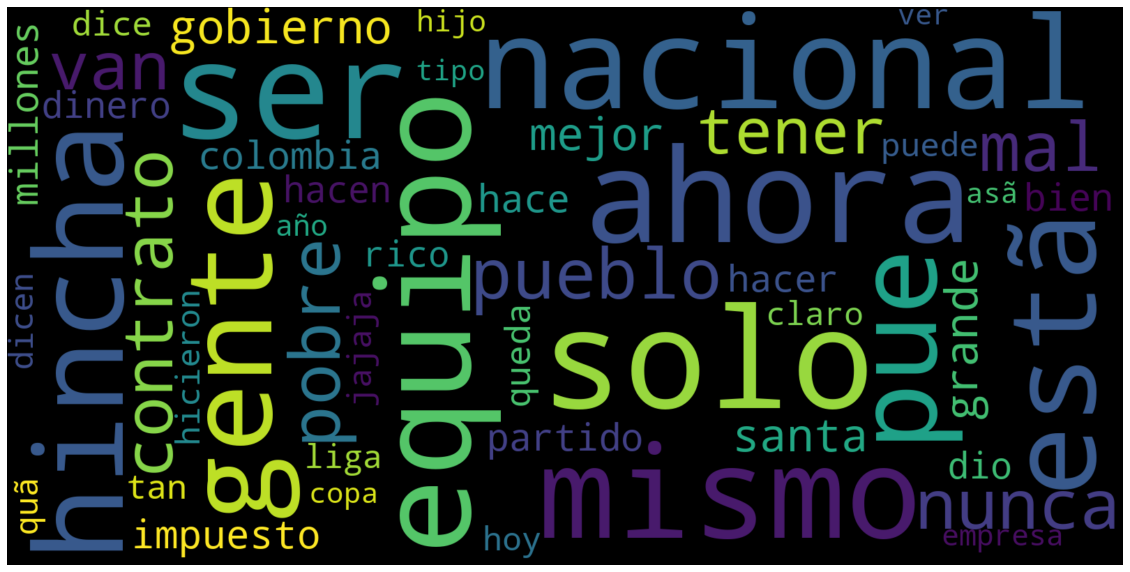

In [115]:
positivo = datos[datos["puntaje"]<0.2]
cleaned_tweets = []
for i in positivo.index:                                                                 
    cleaned_tweets.append(cleaning_tweets(positivo.Tweet[i]))

string = pd.Series(cleaned_tweets).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, stopwords=stops,height=800,max_font_size=200,
                      max_words=50,collocations=False, background_color='black').generate(string)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## API de Google Maps

Tarea es usar la API de Google
1. [Leer](https://maplink.global/blog/es/como-obtener-google-maps-api-key/)